6.549797e-08
8.946008e-08
[[350 500]
 [350 500]
 [509 608]
 [510 640]
 [513 671]
 [516 711]
 [519 730]
 [517 761]
 [523 783]
 [350 500]
 [350 500]]
Processing subtraction for image  0
radialFuncpB:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.272896687177067e-07, 5.41924251889696e-06, 6.6802344268320914e-06, 5.391732642868989e-06, 4.495635818914577e-06, 3.7745058966256497e-06, 3.237771162108698e-06, 2.7808182123259697e-06, 2.417267732736796e-06, 2.1233995725271255e-06, 1.8688048969904358e-06, 1.6490852041377883e-06, 1.471657079881489e-06, 1.3170134962467493e-06, 1.1787922408168054e-06, 1.0616437131310313e-06, 9.584282684138125e-07, 8.747702775842613e-07, 7.939918119444307e-07, 7.243286615578526e-07, 6.721597856085281e-07, 6.102256325643144e-07, 5.650034655464341e-07, 5.23640709133713e-07, 4.881236951145444e-07, 4.4827808027066007e-07, 4.1580372509292366e-07, 3.887938901800448e-07, 3.622817507211762e-07, 3.3533519065397805e-07, 3.193326174554461e-07, 2.993886747223157

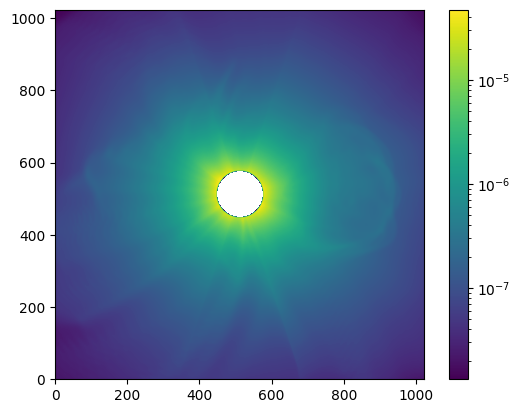

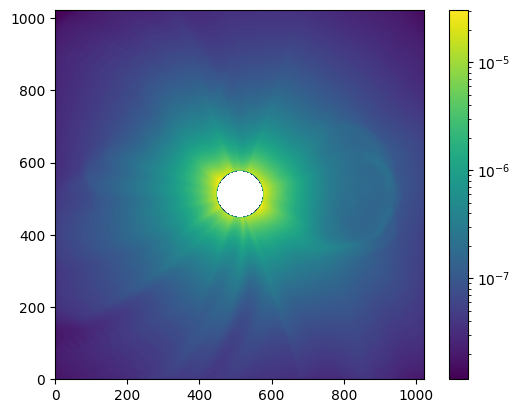

In [12]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal


fits_file_pB = fits.open('CME_0_pB\stepnum_078.fits')
fits_file_tB = fits.open('CME_0_tB\stepnum_078.fits')
fits_file_pB2 = fits.open('CME_0_pB\stepnum_020.fits')
fits_file_tB2 = fits.open('CME_0_tB\stepnum_020.fits')

image_data_pB = fits_file_pB[0].data
image_data_tB = fits_file_tB[0].data
image_data_pB2 = fits_file_pB2[0].data
image_data_tB2 = fits_file_tB2[0].data

# print(image_data_pB)
# print(image_data_tB)
print(image_data_pB[900][600])
print(image_data_tB[900][600])

plt.figure()
plt.imshow(image_data_tB, origin='lower', norm=LogNorm())
plt.colorbar()
# plt.show()
plt.figure()
plt.imshow(image_data_pB, origin='lower', norm=LogNorm())
plt.colorbar()

# front_array = [[0,0],[0,0],[108,159],[140,160],[171,163],[195,175],[216,185],[241,167],[259,183],[274,172],[0,0]]
front_array = [[0,0],[0,0],[108,159],[140,160],[171,163],[195,175],[230,169],[261,167],[283,173],[0,0],[0,0]]

front_array_absolute = np.zeros((len(front_array),2),dtype=int)
front_array = np.array(front_array)

front_array_absolute[:,1] = front_array[:,0] + 500
front_array_absolute[:,0] = front_array[:,1] + 350

front_array_absolute[5,:] = [516,711]

print(front_array_absolute)

xMin = 500
xMax = 1000

yMin = 250
yMax = 750

# xMin = 0
# xMax = 1023

# yMin = 0
# yMax = 1023

pBdata = []
tBdata =[]



for i in range(5,60,5):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(2*fits_file_pB[0].data - fits_file_tB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 7
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))


    


allIndices = calculateRadialBands(pBdata[0])

for i in range(len(pBdata)):
    pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
    tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')

for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)
    # pBdata[i] = subtractRadialMedian(pBdata[i], calculate_median_pixel_values(pBdata[i]))   
    # tBdata[i] = subtractRadialMedian(tBdata[i], calculate_median_pixel_values(tBdata[i]))  
    # pBdata[i] = minSmooth(pBdata[i], 50)  
    # tBdata[i] = minSmooth(tBdata[i], 50)   
    
    lookForwardPix = 50

    point = front_array_absolute[i]
    pointSub = []
    pointSub.append(point[0])
    pointSub.append(point[1] + lookForwardPix)
    subValuepB = pBdata[i][pointSub[0],pointSub[1]]
    subValuetB = tBdata[i][pointSub[0],pointSub[1]]
    weight = ((pointSub[1] - 512) - (pointSub[1] - 512)//5*5)/5.0

    radialFuncpB = calculateMedianPixelValues(pBdata[i],allIndices)
    radialFunctB = calculateMedianPixelValues(tBdata[i],allIndices)
    
    print("radialFuncpB: ", radialFuncpB)
    print("radialFunctB: ", radialFunctB)

    idxpB = (np.abs(radialFuncpB - subValuepB)).argmin()
    idxtB = (np.abs(radialFunctB - subValuetB)).argmin()
    if(radialFunctB[idxtB] > subValuetB):
        idxpBup = idxpB + 1
        idxtBup = idxtB + 1
    else:
        idxpBup = idxpB 
        idxtBup = idxtB
        idxpB = idxpB - 1
        idxtB = idxtB - 1
    
    # print(point[0], point[1])
    print("prev: subtracting pB: ", pBdata[i][pointSub[0],pointSub[1]],  " from ", pBdata[i][point[0],point[1]] )
    print("actu: subtracting pB: ", (radialFuncpB[idxpB - lookForwardPix//5]*(1-weight) + radialFuncpB[idxpBup - lookForwardPix//5]*(weight)),  " from ", pBdata[i][point[0],point[1]] )
    print("prev: subtracting tB: ", tBdata[i][pointSub[0],pointSub[1]],  " from ", tBdata[i][point[0],point[1]] )
    print("actu: subtracting tB: ", (radialFunctB[idxtB - lookForwardPix//5]*(1-weight) + radialFunctB[idxtBup - lookForwardPix//5]*(weight)),  " from ", tBdata[i][point[0],point[1]] )
    pBdata[i][point[0], point[1]] = pBdata[i][point[0],point[1]] - (radialFuncpB[idxpB - lookForwardPix//5]*(1-weight) + radialFuncpB[idxpBup - lookForwardPix//5]*(weight))
    tBdata[i][point[0], point[1]] = tBdata[i][point[0],point[1]] - (radialFunctB[idxtB - lookForwardPix//5]*(1-weight) + radialFunctB[idxtBup - lookForwardPix//5]*(weight))
    # pBdata[i][point[0], point[1]] = pBdata[i][point[0],point[1]] - radialFuncpB[idxpB - lookForwardPix//5]
    # tBdata[i][point[0], point[1]] = tBdata[i][point[0],point[1]] - radialFunctB[idxtB - lookForwardPix//5]
    

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat

xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

# vmin = 40
# vmax = 140
vmin = -20
vmax = 80

# plt.figure()
# plt.imshow(image_data_pB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(image_data_tB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()



# Add data cursor to the plot
# print(posMats)
posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))





[34.5654051  34.69610951 39.70144904 45.21546683 56.51979682 59.33204353
 65.56822178]
[-17.68216736 -12.19336309 -11.75167753 -10.22793221 -18.17973418
 -15.55368881 -17.8922765 ]
pos m:  5.682095209432047
pos b:  30.896356174381715
mean:  47.942641802677876
neg m:  -0.4921084107175789
neg b:  -13.306651866937028
mean:  -14.782977099089765


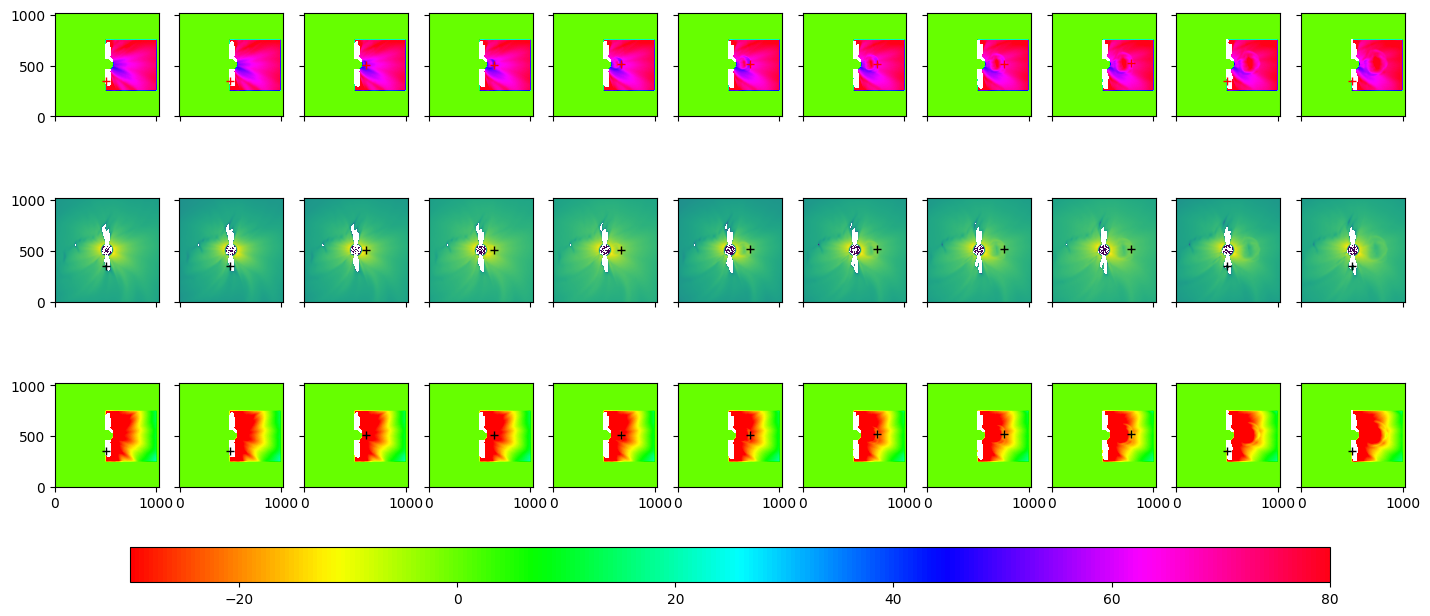

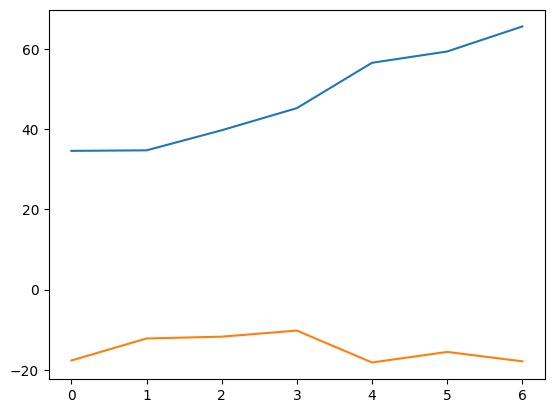

In [13]:

fig, axs = plt.subplots(3,len(pBdata),figsize=(15, 7), sharex=True, sharey=True)


vmin = -30
vmax = 80

for i in range(len(pBdata)): 
    axs[0,i].imshow(posMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    axs[1,i].imshow(pBdata[i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    im = axs[2,i].imshow(negMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')


# front_array = [[0,0],[0,0],[108,159],[140,160],[171,163],[195,175],[216,185],[241,167],[259,183],[274,172],[0,0]]



# front_array = [[0,0],[0,0],[108,159],[140,160],[171,163],[195,175],[230,169],[261,167],[283,173],[0,0],[0,0]]
front_array = front_array_absolute


for i in range(len(pBdata)):
    axs[1,i].plot(front_array[i][1], front_array[i][0], 'k+')
    axs[2,i].plot(front_array[i][1], front_array[i][0], 'k+')
    axs[0,i].plot(front_array[i][1], front_array[i][0], 'r+')


fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array[i][0],front_array[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array[i][0],front_array[i][1]]
print(posMatsGraph[2:9])
print(negMatsGraph[2:9])

posCoef = np.polyfit(np.arange(0,7),posMatsGraph[2:9],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("mean: ", np.mean(posMatsGraph[2:9]))
negCoef = np.polyfit(np.arange(0,7),negMatsGraph[2:9],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("mean: ", np.mean(negMatsGraph[2:9]))
# poly1d_fn = np.poly1d(posCoef) 


plt.figure()   
plt.plot(posMatsGraph[2:9], label='Positive Exit Angle')
plt.plot(negMatsGraph[2:9], label='Negative Exit Angle') 

plt.show()

In [14]:

print(front_array[2])
print(posMatsData[2][front_array[2][0],front_array[2][1]])

[509 608]
34.56540509947251
